# Evaluation

In [1]:
# import libraries
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_fscore_support as score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
import numpy as np

In [2]:
# read the data
df_zs = pd.read_csv('..\\Playground_LLM\\..\\Resources\\EvaluationDatasetZeroShot.csv',
                    delimiter=';')
df_fs = pd.read_csv('..\\Playground_LLM\\..\\Resources\\EvaluationDatasetFewShot.csv',
                    delimiter=';', usecols=['edgeUsable', 'LLMAnswer'],
                    na_values=['None'])

# drop all NAs in column LLMAnswer
df_fs = df_fs.dropna(subset=['LLMAnswer']).astype(bool)

In [3]:
# read data for llama
df_zs_llama = pd.read_csv('..\\Playground_LLM\\..\\Resources\\EvaluationDatasetLLama2ZeroShot.csv',
                          delimiter=';')
df_fs_llama = pd.read_csv('..\\Playground_LLM\\..\\Resources\\EvaluationDatasetLLama2.csv',
                          delimiter=';')

In [39]:
# reat data for dynamic edge weights
df_dew = pd.read_csv('..\\Playground_LLM\\..\\Resources\\EvaluationDatasetOpenaiFewShotWeights.csv',
                          delimiter=';')

# # convert column lengthDependency to boolean
# df_dew['lengthDependency'] = df_dew['lengthDependency'].astype(bool)

In [5]:
print('The GPT 3.5 model results are: ')
print()
# calculate the accuracy
accuracy_zs = accuracy_score(df_zs['edgeUsable'], df_zs['ZeroShotOutput'])
accuracy_fs = accuracy_score(df_fs['edgeUsable'], df_fs['LLMAnswer'])
# calcualte the precision, recall and fscore
precision_zs, recall_zs, f1_zs, support_zs = score(df_zs['edgeUsable'],
                                                         df_zs['ZeroShotOutput'],
                                                         average='binary')
precision_fs, recall_fs, f1_fs, support_fs = score(df_fs['edgeUsable'],
                                                            df_fs['LLMAnswer'],
                                                            average='binary')
# print results
print('The accuracy of the ZeroShotOutput is: ', round(accuracy_zs,4))
print('The accuracy of the FewShotOutput is: ', round(accuracy_fs,4))
print()
print('The precision of the ZeroShotOutput is: ', round(precision_zs,4))
print('The precision of the FewShotOutput is: ', round(precision_fs,4))
print()
print('The recall of the ZeroShotOutput is: ', round(recall_zs,4))
print('The recall of the FewShotOutput is: ', round(recall_fs,4))
print()
print('The f1_score of the ZeroShotOutput is: ', round(f1_zs,4))
print('The f1_score of the FewShotOutput is: ', round(f1_fs,4))

The GPT 3.5 model results are: 

The accuracy of the ZeroShotOutput is:  0.8393
The accuracy of the FewShotOutput is:  0.9151

The precision of the ZeroShotOutput is:  0.84
The precision of the FewShotOutput is:  0.9184

The recall of the ZeroShotOutput is:  0.8077
The recall of the FewShotOutput is:  0.9

The f1_score of the ZeroShotOutput is:  0.8235
The f1_score of the FewShotOutput is:  0.9091


In [6]:
# same for llama model
print('The LLAMA model results are: ')
print()
# calculate the accuracy
accuracy_zs_llama = accuracy_score(df_zs_llama['edgeUsable'], df_zs_llama['LLMAnswer'])
accuracy_fs_llama = accuracy_score(df_fs_llama['edgeUsable'], df_fs_llama['LLMAnswer'])
# calcualte the precision, recall and fscore
precision_zs_llama, recall_zs_llama, f1_zs_llama, support_zs_llama = score(df_zs_llama['edgeUsable'],
                                                                           df_zs_llama['LLMAnswer'],
                                                                           average='binary')
precision_fs_llama, recall_fs_llama, f1_fs_llama, support_fs_llama = score(df_fs_llama['edgeUsable'],
                                                                           df_fs_llama['LLMAnswer'],
                                                                           average='binary')
# print results
print('The accuracy of the ZeroShotOutput is: ', round(accuracy_zs_llama,4))
print('The accuracy of the FewShotOutput is: ', round(accuracy_fs_llama,4))
print()
print('The precision of the ZeroShotOutput is: ', round(precision_zs_llama,4))
print('The precision of the FewShotOutput is: ', round(precision_fs_llama,4))
print()
print('The recall of the ZeroShotOutput is: ', round(recall_zs_llama,4))
print('The recall of the FewShotOutput is: ', round(recall_fs_llama,4))
print()
print('The f1_score of the ZeroShotOutput is: ', round(f1_zs_llama,4))
print('The f1_score of the FewShotOutput is: ', round(f1_fs_llama,4))

The LLAMA model results are: 

The accuracy of the ZeroShotOutput is:  0.6607
The accuracy of the FewShotOutput is:  0.5179

The precision of the ZeroShotOutput is:  0.6129
The precision of the FewShotOutput is:  0.4737

The recall of the ZeroShotOutput is:  0.7308
The recall of the FewShotOutput is:  0.3462

The f1_score of the ZeroShotOutput is:  0.6667
The f1_score of the FewShotOutput is:  0.4


In [40]:
# same for llama model
print('The results of the dynamic edge weight approach are: ')
print()
# calculate the accuracy
accuracy_dew = accuracy_score(df_dew['lengthDependency'], df_dew['LLMAnswer'])
# calcualte the precision, recall and fscore
precision_dew, recall_dew, f1_dew, support_dew = score(df_dew['lengthDependency'],
                                                       df_dew['LLMAnswer'],
                                                       average='binary')

# print results
print('The accuracy is: ', round(accuracy_dew,4))
print()
print('The precision is: ', round(precision_dew,4))
print()
print('The recall is: ', round(recall_dew,4))
print()
print('The f1_score is: ', round(f1_dew,4))

The results of the dynamic edge weight approach are: 

The accuracy is:  0.6875

The precision is:  0.8235

The recall is:  0.4912

The f1_score is:  0.6154


In [8]:
import itertools
import matplotlib.pyplot as plt
import numpy as np
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

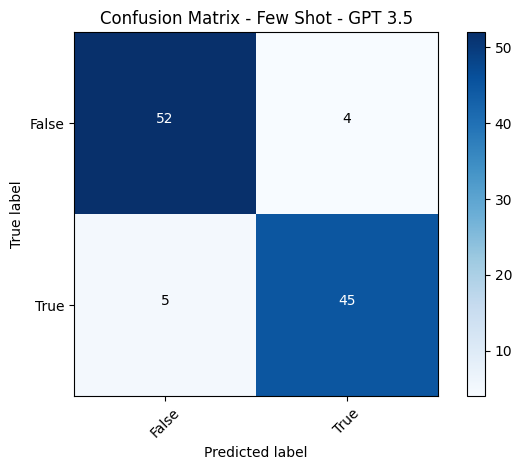

In [9]:
cnf_matrix_fs = confusion_matrix(df_fs['edgeUsable'], df_fs['LLMAnswer'])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix_fs, classes=['False', 'True'], title='Confusion Matrix - Few Shot - GPT 3.5')

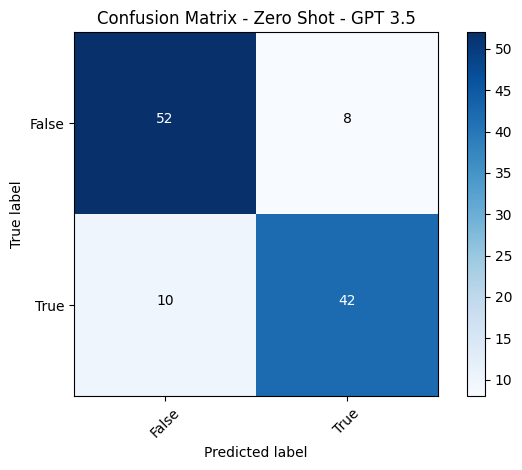

In [10]:
cnf_matrix_zs = confusion_matrix(df_zs['edgeUsable'], df_zs['ZeroShotOutput'])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix_zs, classes=['False', 'True'], title='Confusion Matrix - Zero Shot - GPT 3.5')

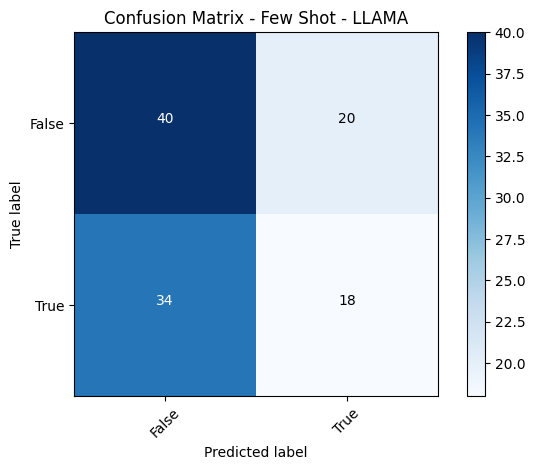

In [11]:
cnf_matrix_fs_llama = confusion_matrix(df_fs_llama['edgeUsable'], df_fs_llama['LLMAnswer'])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix_fs_llama, classes=['False', 'True'], title='Confusion Matrix - Few Shot - LLAMA')

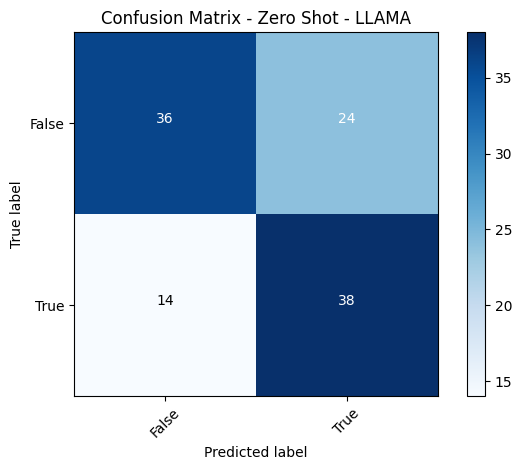

In [12]:
cnf_matrix_zs_llama = confusion_matrix(df_zs_llama['edgeUsable'], df_zs_llama['LLMAnswer'])
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix_zs_llama, classes=['False', 'True'], title='Confusion Matrix - Zero Shot - LLAMA')

# ROC Curves

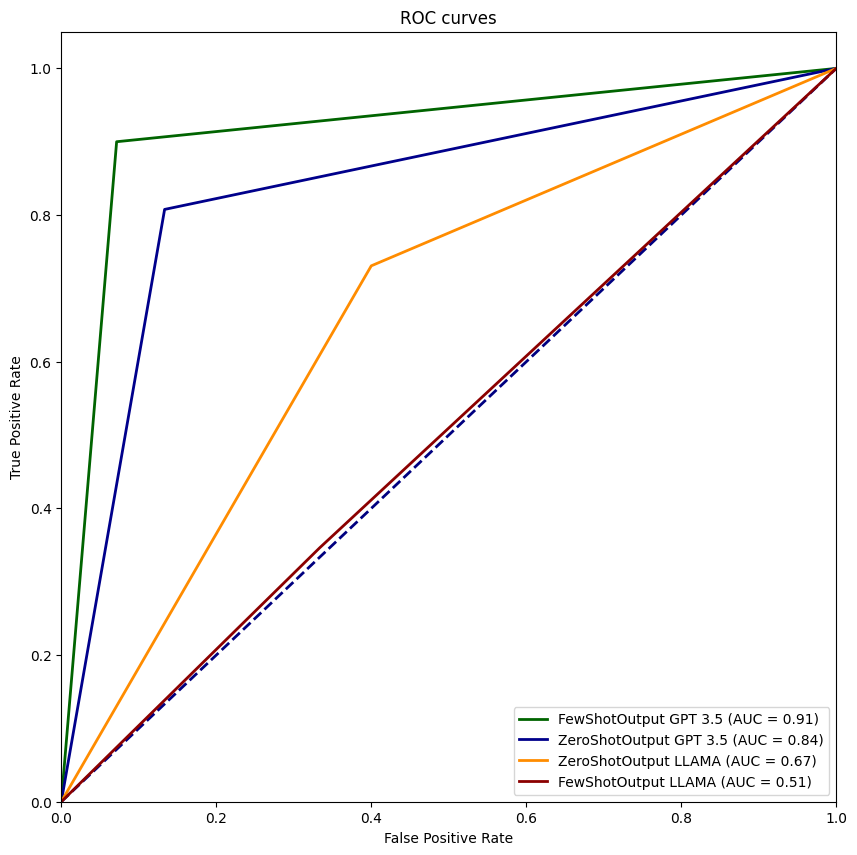

In [13]:
# calculate the fpr and tpr for all thresholds of the ZeroShotOutput for GPT 3.5
fpr_zs, tpr_zs, threshold_zs = roc_curve(df_zs['edgeUsable'], df_zs['ZeroShotOutput'])
roc_auc_zs = auc(fpr_zs, tpr_zs)
# calculate the fpr and tpr for all thresholds of the FewShotOutput for GPT 3.5
fpr_fs, tpr_fs, threshold_fs = roc_curve(df_fs['edgeUsable'], df_fs['LLMAnswer'])
roc_auc_fs = auc(fpr_fs, tpr_fs)

# calculate the fpr and tpr for all thresholds of the ZeroShotOutput for LLAMA
fpr_zs_llama, tpr_zs_llama, threshold_zs_llama = roc_curve(df_zs_llama['edgeUsable'], df_zs_llama['LLMAnswer'])
roc_auc_zs_llama = auc(fpr_zs_llama, tpr_zs_llama)
# calculate the fpr and tpr for all thresholds of the FewShotOutput for LLAMA
fpr_fs_llama, tpr_fs_llama, threshold_fs_llama = roc_curve(df_fs_llama['edgeUsable'], df_fs_llama['LLMAnswer'])
roc_auc_fs_llama = auc(fpr_fs_llama, tpr_fs_llama)

# plot the ROC curve
plt.figure(figsize=(10,10))
plt.plot(fpr_fs, tpr_fs, color='darkgreen', lw=2,
         label='FewShotOutput GPT 3.5 (AUC = %0.2f)' % roc_auc_fs)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.plot(fpr_zs, tpr_zs, color='darkblue', lw=2,
         label='ZeroShotOutput GPT 3.5 (AUC = %0.2f)' % roc_auc_zs)
plt.plot(fpr_zs_llama, tpr_zs_llama, color='darkorange', lw=2,
            label='ZeroShotOutput LLAMA (AUC = %0.2f)' % roc_auc_zs_llama)
plt.plot(fpr_fs_llama, tpr_fs_llama, color='darkred', lw=2,
            label='FewShotOutput LLAMA (AUC = %0.2f)' % roc_auc_fs_llama)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curves')
plt.legend(loc="lower right")
plt.show()